<a href="https://colab.research.google.com/github/riviera2015/MOLFARES/blob/master/MAKE_CLASSIF_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Загрузка библиотек
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
# Загрузка датасета
url1 = "https://kaggle.com/input/hotel-booking-demand/hotel_bookings.csv"
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

# Разделение датасета на обучающую и контрольную выборки
array = dataset.values

# Выбор первых 4-х столбцов 
X = array[:,0:4]

# Выбор 5-го столбца 
y = array[:,4]


In [7]:
# Задать начальное значение для ГПСЧ
#np.random.seed(0)
from sklearn.datasets import make_classification
import numpy as np
np.random.seed(10)

# Количество признаков
number_of_features = 100
X, y = make_classification(n_samples=1255,
                           n_features = number_of_features,
                                      n_informative = 3,#добавил
                                       n_redundant = 0,
                                       n_classes = 3,
                                       weights = [.5, .5],
                                       random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27)
print(y)
len(y_test)

[0 0 2 ... 0 0 1]


339

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


LR: 0.812076 (0.050575)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


LDA: 0.817547 (0.043134)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


KNN: 0.695413 (0.038632)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


CART: 0.808875 (0.035999)
NB: 0.799988 (0.054658)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


SVM: 0.832788 (0.045982)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


XGB: 0.880841 (0.045562)


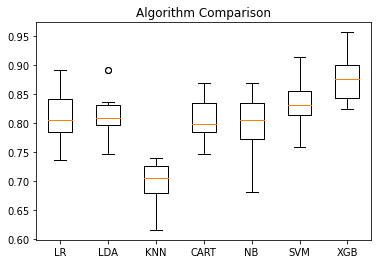

In [8]:
# Разделение X и y на обучающую и контрольную выборки 
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Загружаем алгоритмы моделей
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(n_estimators=100, max_depth=10)))
# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# ПРОГНОЗ
# Загрузка библиотек
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Загрузка датасета
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = read_csv(url, names=names)

# Разделение датасета на обучающую и контрольную выборки
#array = dataset.values

# Выбор первых 4-х столбцов 
#X = array[:,0:4]

# Выбор 5-го столбца 
#y = array[:,4]

# Разделение X и y на обучающую и контрольную выборки 
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Создаем прогноз на контрольной выборке
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Оцениваем прогноз
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8938053097345132
[[158  21]
 [ 15 145]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       179
           1       0.87      0.91      0.89       160

    accuracy                           0.89       339
   macro avg       0.89      0.89      0.89       339
weighted avg       0.89      0.89      0.89       339



In [ ]:
pre=72
rec=68
f1= 2*pre*rec/(pre+rec)
print(f1)

69.94285714285714


In [ ]:
# Supervised transformation based on random forests
from sklearn.ensemble import RandomForestClassifier
# calculate area under curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

rf = RandomForestClassifier(max_depth=3, n_estimators=10)
cls_rf=rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)


In [ ]:
print(auc_rf)

0.9220146648044693


In [ ]:
def training(model,X_train, y_train):
    return model.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
def evaluation_stats(model,X_train, X_test, y_train, y_test,algo,is_feature=True):
    print('Train Accuracy')
    if algo=='NN':
        print(confusion_matrix(y_train,model.predict_classes(X_train)))
        y_pred = model.predict_classes(X_test)
    else:
        print(confusion_matrix(y_train,model.predict(X_train)))
        y_pred = model.predict(X_test)
    print('Validation Accuracy')
    
    print(confusion_matrix(y_test,y_pred))
    print('Classification_report')
    print(classification_report(y_test,y_pred))
    if is_feature:
        plot_feature_importance(rf_model.feature_importances_,x.columns,algo)
    

In [ ]:
evaluation_stats(rf,X_train, X_test, y_train, y_test,'RANDOM FOREST')

Train Accuracy
[[410  38]
 [ 43 425]]
Validation Accuracy
[[157  22]
 [ 17 143]]
Classification_report
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       179
           1       0.87      0.89      0.88       160

    accuracy                           0.88       339
   macro avg       0.88      0.89      0.88       339
weighted avg       0.89      0.88      0.89       339



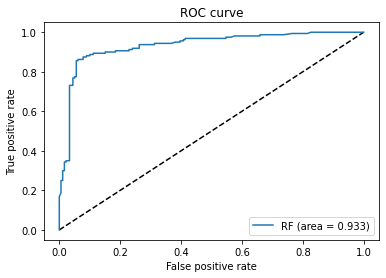

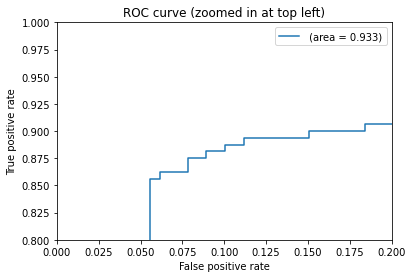

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras, label='Benign (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label=' (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

Confusion matrix, without normalization
[[157  22]
 [ 17 143]]
Normalized confusion matrix
[[0.88 0.12]
 [0.11 0.89]]


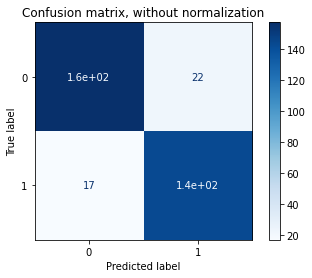

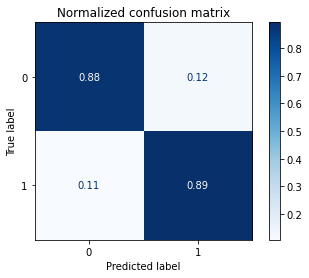

In [ ]:
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=2)
class_names = (["0","1"])
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cls_rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5164
Epoch 2/20
92/92 [==============================] - 0s 1ms/step - loss: 0.6320 - accuracy: 0.6998
Epoch 3/20
92/92 [==============================] - 0s 1ms/step - loss: 0.5377 - accuracy: 0.7926
Epoch 4/20
92/92 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.8592
Epoch 5/20
92/92 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8897
Epoch 6/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2761 - accuracy: 0.9072
Epoch 7/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2481 - accuracy: 0.9148
Epoch 8/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2306 - accuracy: 0.9192
Epoch 9/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9258
Epoch 10/20
92/92 [==============================] - 0s 1ms/step - loss: 0.2080 - accuracy: 0.9290
Epoch 11/20
92/92 [

In [ ]:
evaluation_stats(model,X_train, X_test, y_train, y_test,'NN',is_feature=False)

Train Accuracy
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[430  18]
 [ 26 442]]
Validation Accuracy
[[160  19]
 [ 15 145]]
Classification_report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       179
           1       0.88      0.91      0.90       160

    accuracy                           0.90       339
   macro avg       0.90      0.90      0.90       339
weighted avg       0.90      0.90      0.90       339



In [ ]:
employee_numbers = [2, 9, 18, 28]
employee_names = ["Дима", "Марина", "Андрей", "Никита"]

zipped_values = zip(employee_names, employee_numbers)
zipped_list = list(zipped_values)

print(zipped_list)

[('Дима', 2), ('Марина', 9), ('Андрей', 18), ('Никита', 28)]


In [ ]:
employees_zipped = [('Дима', 2), ('Марина', 9), ('Андрей', 18), ('Никита', 28)]
employee_names, employee_numbers = zip(*employees_zipped)

print(employee_names)
print(employee_numbers)

('Дима', 'Марина', 'Андрей', 'Никита')
(2, 9, 18, 28)
